# Descriptive Analytics and Data Preprocessing on Sales & Discounts Dataset

●	To perform descriptive analytics, visualize data distributions, and preprocess the dataset for further analysis.

## Descriptive Analytics for Numerical Columns

**Objective:** To compute and analyze basic statistical measures for numerical columns in the dataset.

In [12]:
import pandas as pd
df = pd.read_csv(r"E:\Data Science Course\Completed Data Science Assignments\sales_data_with_discounts.csv")
df

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [13]:
# Complete Information about the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


### Information about only numerical columns in the Dataset

In [14]:
# Information about only numerical columns in the Dataset

num_col = df.select_dtypes(include= ['int64','float64']).columns
print('Numerical Columns = ',num_col)

Numerical Columns =  Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')


### Calculate Mean, Median, Mode, and Standard Deviation

In [15]:
# Calculate statistical measures
stats = {}
for col in num_col:
    mean = df[col].mean()
    median = df[col].median()
    mode = df[col].mode()[0]
    std_dev = df[col].std()
    stats[col]={'Mean':mean,
                'Median':median,
                'Mode':mode,
                'Std_dev':std_dev}
    

stats_df = pd.DataFrame(stats).T
stats_df

,Mean,Median,Mode,Std_dev
Volume,5.066667,4.000000,3.000000,4.231602
Avg Price,10453.433333,1450.000000,400.000000,18079.904840
Total Sales Value,33812.835556,5700.000000,24300.000000,50535.074173
Discount Rate (%),15.155242,16.577766,5.007822,4.220602
Discount Amount,3346.499424,988.933733,69.177942,4509.902963
Net Sales Value,30466.336131,4677.788059,326.974801,46358.656624


**Interpretation:**

- **High Variability:** Avg Price, Total Sales Value, Discount Amount, and Net Sales Value have high standard deviations, reflecting considerable variability and potential outliers.

- **Skewness:** Lower median values compared to means in Avg Price, Total Sales Value, and Net Sales Value indicate right-skewed distributions.

- **Frequent Low Values:** The modes for several columns are significantly lower than means and medians, highlighting the presence of frequently occurring low values amidst higher averages.

- **Consistency:** Volume and Discount Rate (%) show more consistency with lower standard deviations, indicating less variability in these measures.

## Data Visualization

**Objective:** To visualize the distribution and relationship of numerical and categorical variables in the dataset.

### Histogram For numerical Columns

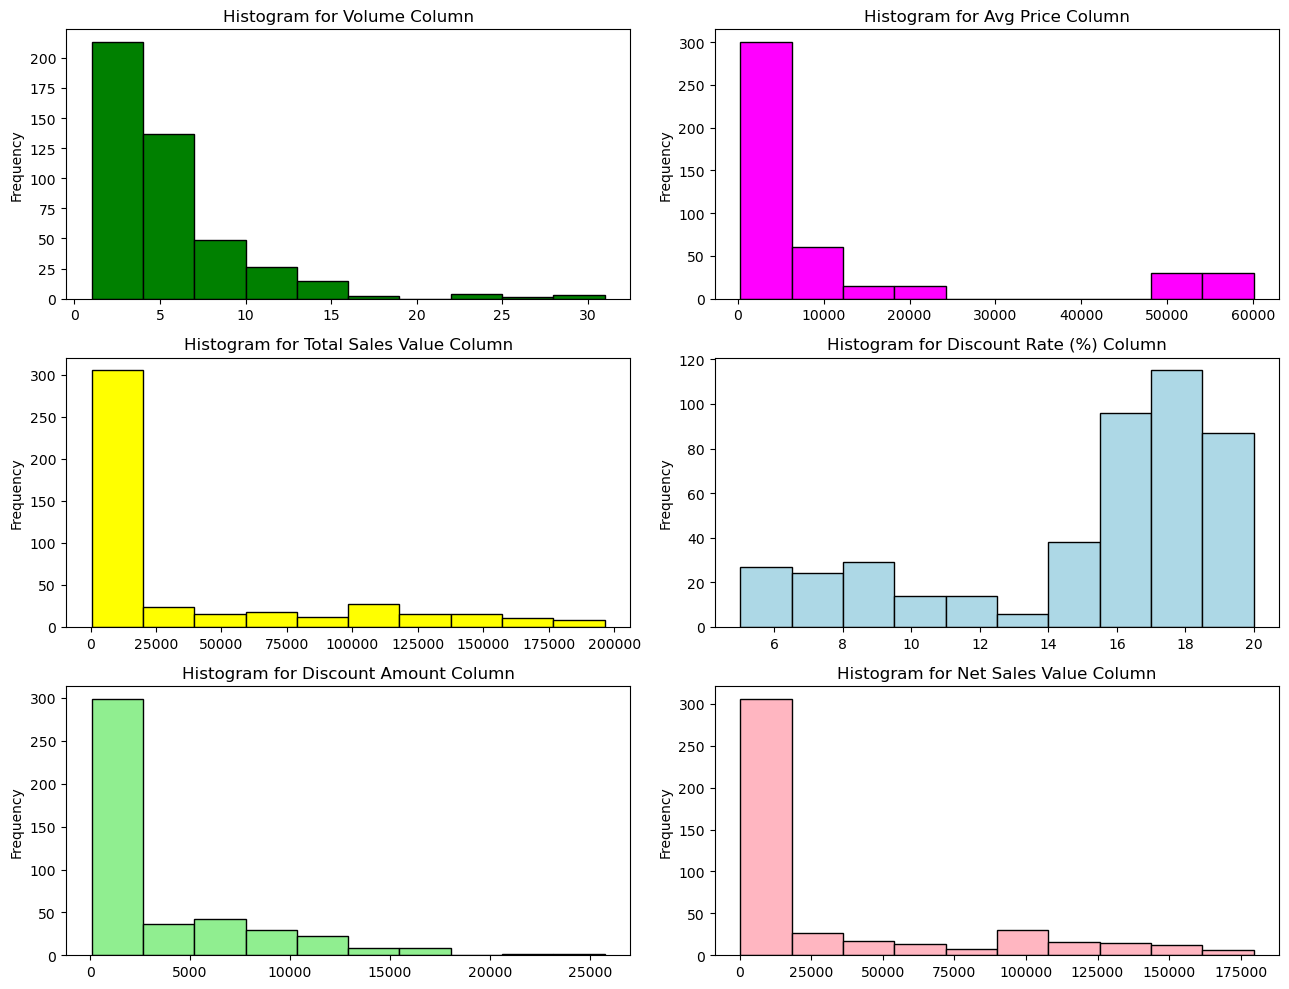

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(13, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create color list for facecolor
fcolor =['green','magenta','yellow','lightblue','lightgreen','lightpink']

for i, col in enumerate(num_col):
    df[col].plot(kind='hist', facecolor=fcolor[i], edgecolor='black', ax=axes[i])
    axes[i].set_title(f'Histogram for {col} Column')


# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Interpretation

1. **Volume Column (Top Left) - Green Histogram:**
- **Skewness:** The distribution is Positive Skewed (right-skewed). This means that most of the data points are concentrated on the left side (lower values), with a tail extending to the right (higher values).

- **Outliers:** There are no visible outliers in this histogram. All data points fall within the range of the intervals on the x-axis, and there are no separate bars indicating extreme values.

2. **Avg Price Column (Top Right) - Pink Histogram:**
- **Skewness**: The histogram shows more values concentrated on the left side, indicating that the data is positively skewed. This means most of the average prices are lower, with fewer higher values stretching the tail to the right.

- **Outliers:** The bars at the higher end of the average price range, which are isolated and have significantly lower frequencies, suggest the presence of outliers. These outliers are the higher average prices that deviate from the rest of the data.

3. **Total Sales Value Column (Middle Left) - Yellow Histogram:**
- **Skewness:** The distribution is right-skewed (positively skewed), indicating that most of the sales values are concentrated on the lower end, with fewer high-value sales.

- **Outliers:** The mode (most frequent value) is between 0 and 25000, but there are still a considerable number of values above 100000, which are outliers as they are far from the central tendency.

4. **Discount Rate (%) Column (Middle Right) - Blue Histogram:**
- **Skewness:** The distribution appears to be left-skewed (negatively skewed). This means that there are fewer occurrences of lower discount rates, with the frequency increasing as we move towards higher rates, peaking around 14-16%.

- **Outliers:** It’s challenging to identify exact outliers from a histogram alone. However, the absence of bars at the extreme ends of the x-axis suggests that there might not be significant outliers in this dataset, or they are not visible in this representation.

5. **Discount Amount Column (Bottom Left) - Light Green Histogram:**
- **Skewness:** The distribution is right-skewed (positively skewed). Most of the discount amounts are low, with a long tail extending to the right, indicating that higher discount amounts are less frequent.

- **Outliers:** There do not appear to be any significant outliers visible in this histogram. All data points fall within a range that gradually tapers off, with no distinct bars distant from others.

6. **Net Sales Value Column (Bottom Right) - Pink Histogram:**
- **Skewness:** The distribution is right-skewed (positively skewed). Most of the sales values are low, with a long tail extending to the right, indicating that higher sales values are less frequent.

- **Outliers:** There do not appear to be any significant outliers visible in this histogram. All data points fall within an expected range without any distinct bars far from others.

### Overall Conclusion:
The data consistently shows positive skewness in most variables, indicating that the bulk of the data is concentrated at the lower end, with long tails extending towards higher values. This suggests that while most transactions are of lower volume, price, and value, there are some outliers representing larger, more significant transactions. The discount rate is an exception, with a slight negative skew, indicating a concentration of higher discount rates. Identifying and understanding these outliers is crucial, as they can significantly impact the overall analysis and might represent unique or noteworthy events in the data.

### Box Plot for all Numerical Columns

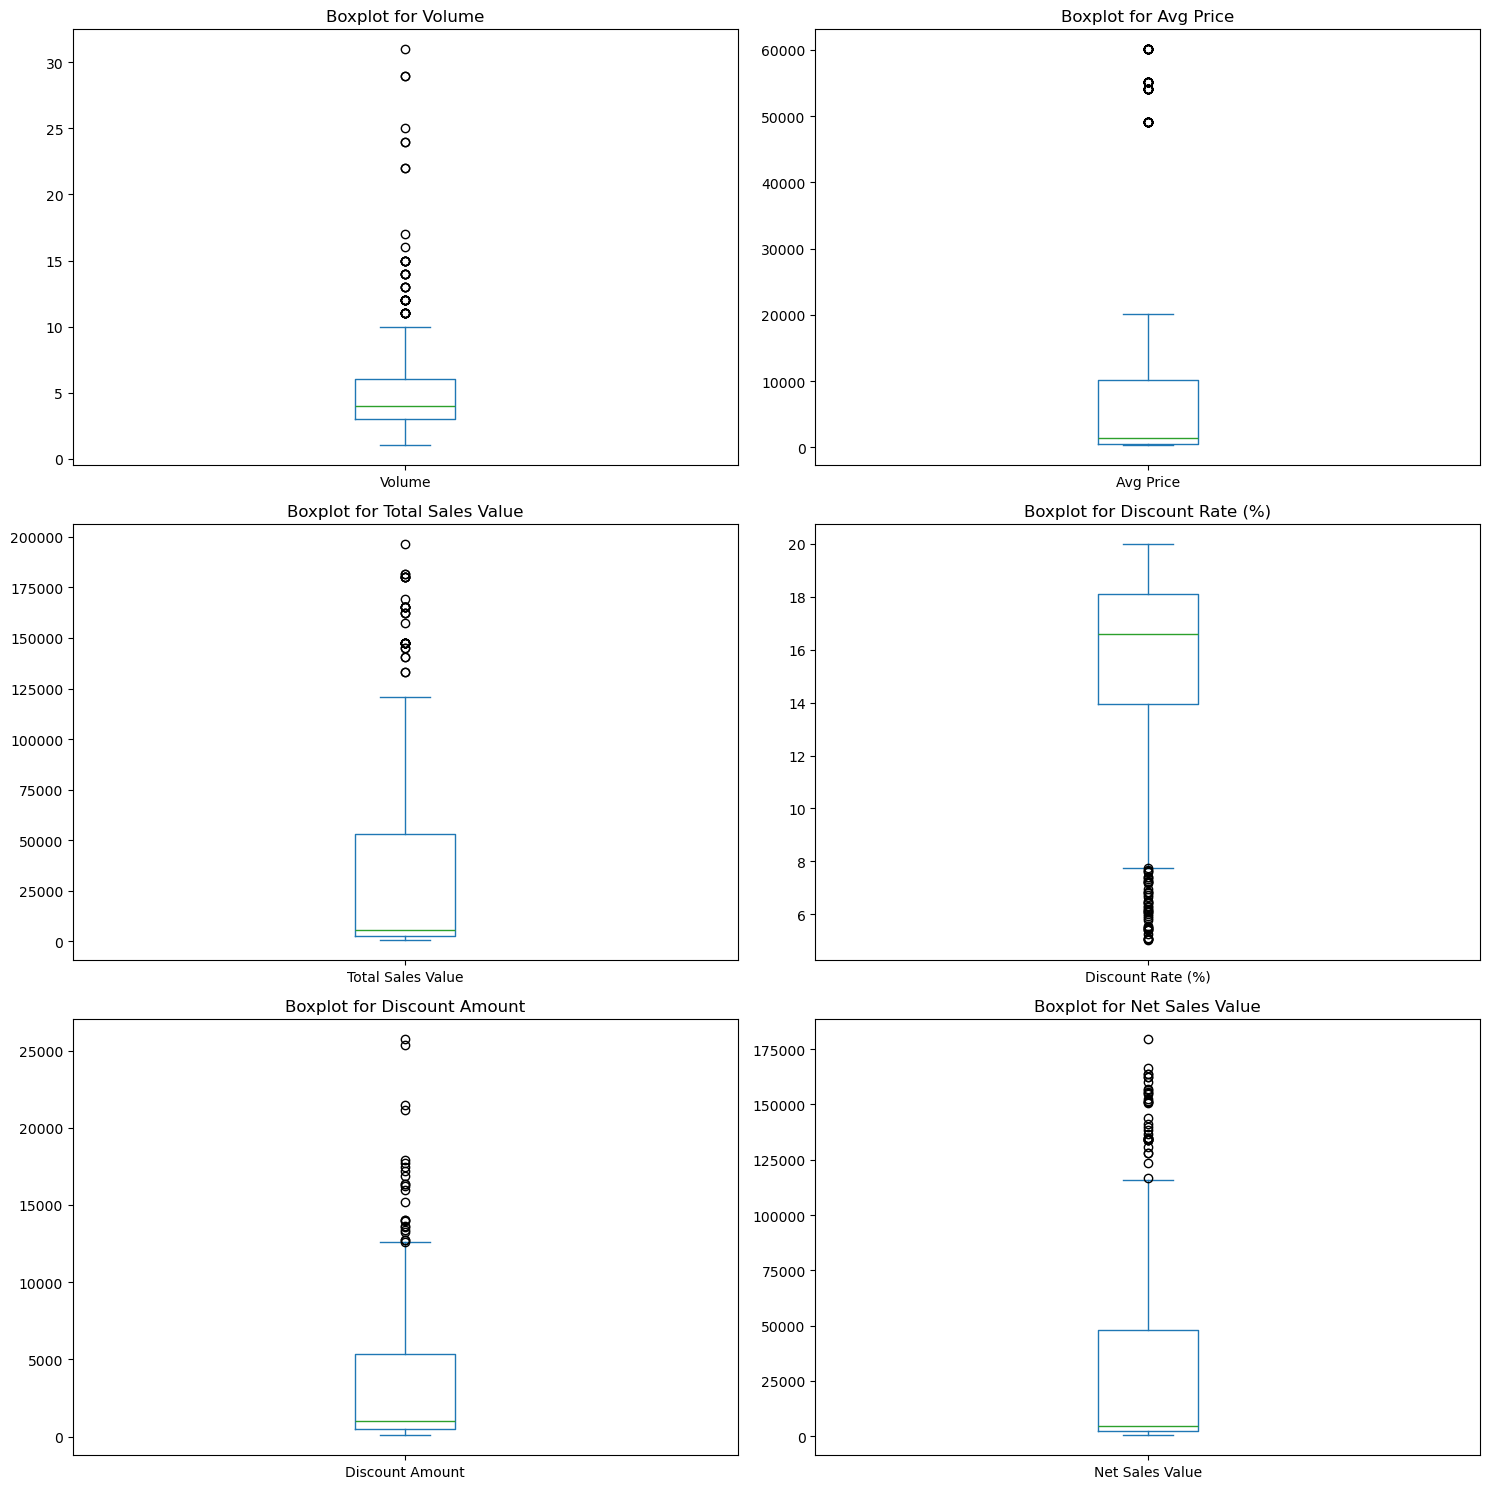

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, col in enumerate(num_col):
    df[col].plot(kind='box', ax=axes[i])
    axes[i].set_title(f'Boxplot for {col}')


# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Insights

1. **Volume**:
   - The distribution is positively skewed with several outliers above the upper whisker. Most data points are clustered below 10 units, but there are some transactions with significantly higher volumes, indicating rare but large sales.

2. **Average Price**:
   - The data also shows positive skewness, with outliers in the higher range (above 50,000 units). Most prices are lower, but there are a few instances where the average price spikes considerably.

3. **Total Sales Value**:
   - Similar to the previous metrics, this is skewed with outliers extending above 150,000 units. The majority of the data falls below 50,000 units, but some large transactions lead to significant total sales values.

4. **Discount Rate (%)**:
   - The boxplot for discount rate has a negative skew, with a concentration of data points in the upper range (closer to 20%) and several lower outliers around 6%. This suggests that most discounts given are relatively high, with a few instances of lower discounts.

5. **Discount Amount**:
   - The distribution shows extreme values with multiple outliers. Most discount amounts are below 10,000 units, but there are several instances where the discount amount is much higher, indicating significant discounts on some transactions.

6. **Net Sales Value**:
   - The distribution is positively skewed with outliers above 125,000 units. Most net sales values are under 50,000 units, but a few transactions significantly exceed this, likely due to either high volume, high average prices, or both.

### Key Findings:
- **Outliers**: All metrics exhibit outliers, indicating occasional extreme values, which could be significant for the business.
- **Skewness**: Most distributions are positively skewed (except for Discount Rate), suggesting that while most transactions are moderate, there are occasional instances of very high values.
- **Discounts**: The discount rate and amount show interesting patterns. The majority of discounts are high, but some transactions receive significantly lower discounts.

These findings could guide further analysis, such as investigating the factors leading to outliers or understanding the business implications of high discounts on sales metrics.

## Identifying Categorical Column in the Dataset

In [18]:
cat_col = df.select_dtypes(include=object).columns
cat_col

Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')

In [19]:
for col in cat_col:
    unique_values =df[col].unique()
    print(f'For {col} Column = {unique_values}')
    print('\n')

For Date Column = ['01-04-2021' '02-04-2021' '03-04-2021' '04-04-2021' '05-04-2021'
 '06-04-2021' '07-04-2021' '08-04-2021' '09-04-2021' '10-04-2021'
 '11-04-2021' '12-04-2021' '13-04-2021' '14-04-2021' '15-04-2021']


For Day Column = ['Thursday' 'Friday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']


For SKU Column = ['M01' 'M02' 'M03' 'M04' 'M05' 'M06' 'M07' 'M08' 'M09' 'M10' 'F01' 'F02'
 'F03' 'F04' 'F05' 'F06' 'F07' 'F08' 'F09' 'F10' 'L01' 'L02' 'L03' 'L04'
 'L05' 'L06' 'L07' 'L08' 'L09' 'L10']


For City Column = ['C']


For BU Column = ['Mobiles' 'FMCG' 'Lifestyle']


For Brand Column = ['RealU' 'YouM' 'Sumsang' 'Orange' 'Babaji' 'Vedic' 'Gear' 'Jeera' 'Viva']


For Model Column = ['RU-10' 'RU-9 Plus' 'YM-99' 'YM-99 Plus' 'YM-98 ' 'RU-9' 'S-20' 'S-21'
 'O-10' 'O-11' 'Babaji Oil ' 'Vedic Cream' 'Vedic Shampoo'
 'Babaji Shampoo' 'Babaji Cream' 'Vedic Oil' 'Gear Oil' 'Gear Cream'
 'Gear Shampoo' 'Gear BB Cream' 'M- T Shirts' 'M- Inners' 'W-Casuals'
 'W-Inners' 'M-Jeans' 'M-C

In [20]:
# So we Analyse that city column has only one unique value, and we are also not considering Date as Category column, so we can remove these two columns from categorical column

cat_col = cat_col.drop(['Date','City'])
cat_col

Index(['Day', 'SKU', 'BU', 'Brand', 'Model'], dtype='object')

### Bar Chart for All Categorical Columns

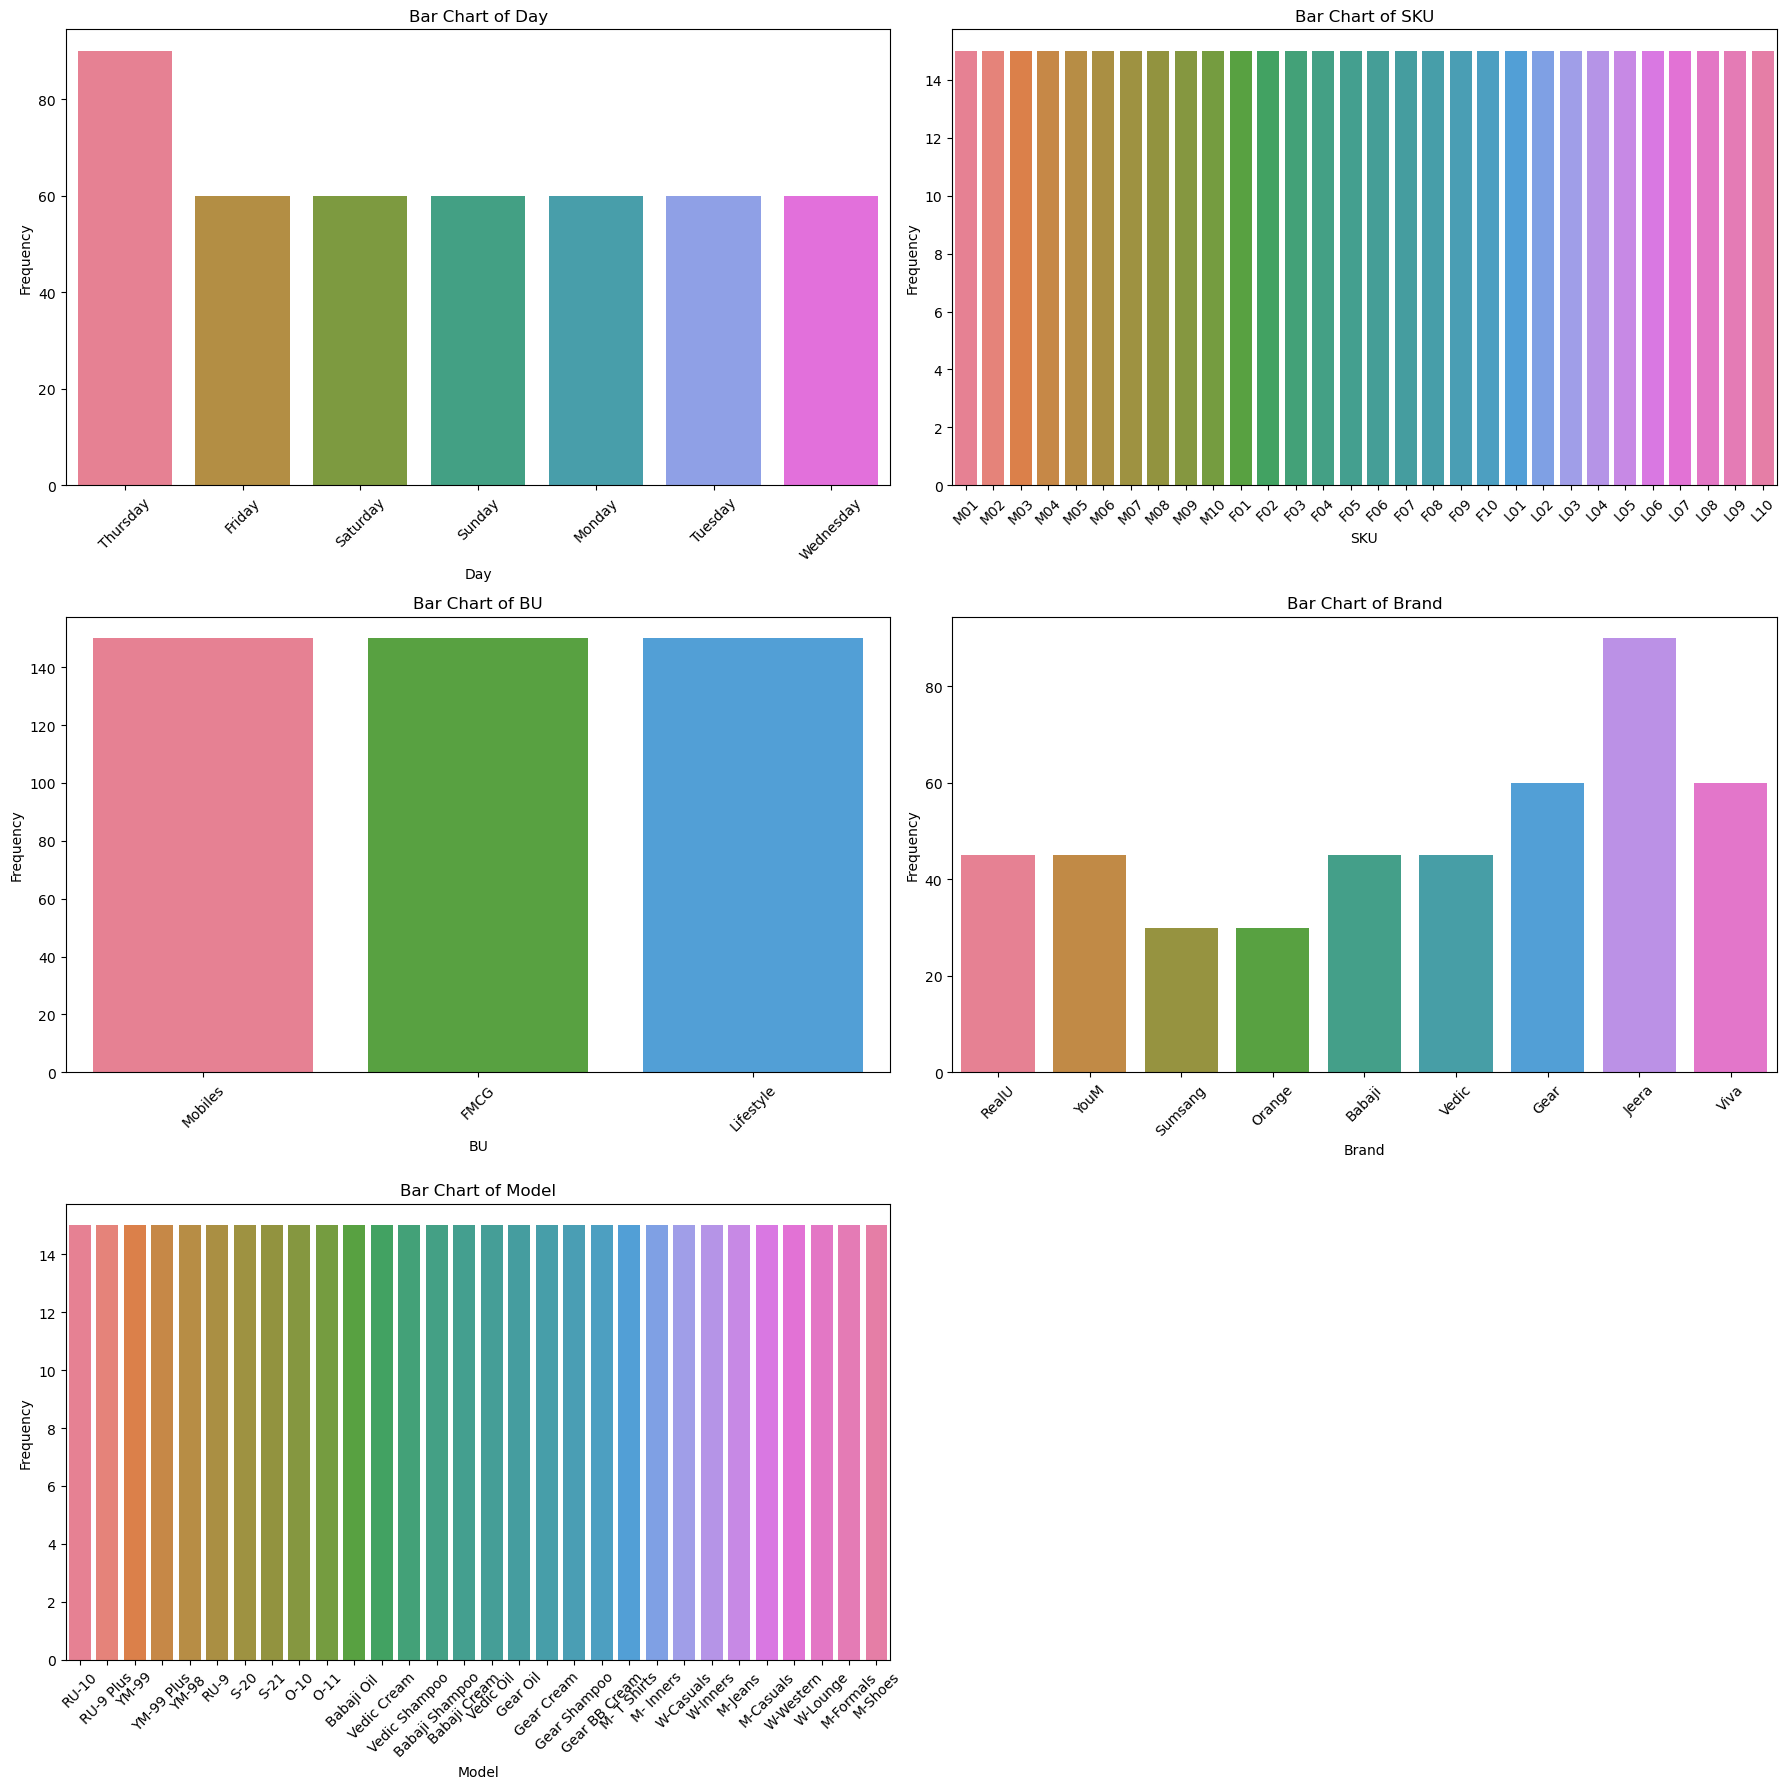

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(18, 18))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, col in enumerate(cat_col):
    sns.countplot(x=col, data=df, ax=axes[i],hue=col, palette='husl')
    axes[i].set_title(f'Bar Chart of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    for tick in axes[i].get_xticklabels():
        tick.set_rotation(45)


# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Insights

1. **Bar Chart of Day:**
   - **Insight:** Thursday has the highest frequency, indicating that this day may have the most transactions or sales. The other days, especially Wednesday, have relatively lower frequencies, suggesting fewer activities on those days.

2. **Bar Chart of SKU:**
   - **Insight:** The SKUs are evenly distributed, with each SKU having the same frequency. This uniform distribution indicates that the products are likely being stocked or sold in equal quantities, showing no particular SKU is favored over others.

3. **Bar Chart of BU (Business Unit):**
   - **Insight:** There are three Business Units (Mobiles, FMCG, Lifestyle), and all have an equal frequency. This suggests that the business or analysis is evenly distributed across these units, with no single unit dominating.

4. **Bar Chart of Brand:**
   - **Insight:** The brand "Jeera" has the highest frequency, indicating it might be the most popular or most frequently sold brand. Brands like "Gear" and "Viva" also have relatively high frequencies, while others like "Samsung" and "Orange" have lower frequencies. This suggests varying popularity or sales performance across different brands.

5. **Bar Chart of Model:**
   - **Insight:** Similar to the SKU distribution, the models are evenly distributed, with each model having the same frequency. This indicates no particular model stands out in terms of sales or distribution.

### Overall Insights:
- **Day Distribution:** Thursday is a peak day for activity.
- **SKU and Model Distribution:** The even distribution across SKUs and models suggests a balanced inventory or sales strategy.
- **Business Unit:** The activities are evenly spread across different business units.
- **Brand Distribution:** "Jeera" stands out as the leading brand, while other brands have moderate to lower frequencies.

This analysis can help in making strategic decisions, such as focusing on high-performing brands or understanding day-specific trends.

## Standardization of Numerical Variables

**Objective:** To scale numerical variables for uniformity, improving the dataset’s suitability for analytical models.

### Standardization (z-score normalization)

**Standardization (Z-Score Normalization)** is a technique used in data preprocessing to transform the features of a dataset so that they have a mean of 0 and a standard deviation of 1. This is particularly useful when you want to bring all features to the same scale, especially when the features have different units or vastly different ranges.

### Formula:
The formula for Z-score normalization is:

$[ Z = \frac{(X - \mu)}{\sigma}]$

- **X**: The value to be standardized.
- **μ** (mu): The mean of the feature values.
- **σ** (sigma): The standard deviation of the feature values.

### Steps for Standardization:
1. **Calculate the mean** of the feature.
2. **Subtract the mean** from each data point.
3. **Divide by the standard deviation** of the feature.

### Example:
Suppose you have a feature with the following values: [10, 20, 30, 40, 50].

1. **Calculate the mean (μ)**:
   $ \mu = \frac{10 + 20 + 30 + 40 + 50}{5} = 30 $

2. **Calculate the standard deviation (σ)**:
   $\sigma = \sqrt{\frac{(10-30)^2 + (20-30)^2 + (30-30)^2 + (40-30)^2 + (50-30)^2}{5}} $
   $ \sigma = \sqrt{\frac{400 + 100 + 0 + 100 + 400}{5}} = \sqrt{200} \approx 14.14 $

3. **Standardize each value**:
   - For 10: $ Z = \frac{10 - 30}{14.14} \approx -1.41 $

   - For 20: $ Z = \frac{20 - 30}{14.14} \approx -0.71 $

   - For 30: $ Z = \frac{30 - 30}{14.14} = 0 $

   - For 40: $ Z = \frac{40 - 30}{14.14} \approx 0.71 $
   
   - For 50: $ Z = \frac{50 - 30}{14.14} \approx 1.41 $

### Benefits:
- **Consistent Scale**: Helps in comparing features with different units or scales.
- **Improved Model Performance**: Some machine learning algorithms perform better when features are on the same scale, especially distance-based algorithms like KNN or SVM.

### Applications:
- Commonly used in preprocessing steps before applying machine learning algorithms.
- Useful in PCA (Principal Component Analysis) for dimensionality reduction.

In [23]:
# All numerical columns
num_col

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [24]:
import pandas as pd

# Assuming num_col is your DataFrame containing only numerical columns
standard_num_col = pd.DataFrame()

# Standardize each column independently
for x in num_col:
    standard_num_col[x] = (df[x] - df[x].mean()) / df[x].std()

In [25]:
# Compairing Numerical Column before and after Standardization

# Display the original numerical columns
df[num_col]

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,15,12100,181500,11.654820,21153.498820,160346.501180
1,10,10100,101000,11.560498,11676.102961,89323.897039
2,7,16100,112700,9.456886,10657.910157,102042.089843
3,6,20100,120600,6.935385,8364.074702,112235.925298
4,3,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...
445,2,1300,2600,15.475687,402.367873,2197.632127
446,6,2600,15600,17.057027,2660.896242,12939.103758
447,2,1600,3200,18.965550,606.897606,2593.102394
448,3,1900,5700,16.793014,957.201826,4742.798174


In [27]:
# Display the standardized numerical columns
standard_num_col

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,2.347417,0.091072,2.922469,-0.829365,3.948422,2.801638
1,1.165831,-0.019548,1.329516,-0.851714,1.846958,1.269613
2,0.456880,0.312312,1.561038,-1.350129,1.621190,1.543957
3,0.220563,0.533552,1.717365,-1.947555,1.112568,1.763847
4,-0.488389,-0.130168,-0.188242,0.672990,0.227598,-0.227342
...,...,...,...,...,...,...
445,-0.724706,-0.506277,-0.617647,0.075924,-0.652815,-0.609783
446,0.220563,-0.434374,-0.360400,0.450596,-0.152022,-0.378079
447,-0.724706,-0.489684,-0.605774,0.902788,-0.607464,-0.601252
448,-0.488389,-0.473091,-0.556303,0.388042,-0.529789,-0.554881


## Conversion of Categorical Data into Dummy Variables

**Objective:** To transform categorical variables into a format that can be provided to ML algorithms.

### Converting Categorical Data into Dummy Variables (One-Hot Encoding)

#### Why It's Needed:
- **Machine Learning Algorithms Require Numerical Input**: Most algorithms cannot directly work with categorical data, as they rely on mathematical operations that don't apply to non-numerical data.

#### What It Does:
- **One-Hot Encoding**: Transforms categorical data into binary columns (dummy variables). Each unique category gets its own column with a `1` for presence and `0` for absence.
  
  **Example**:
  - Original: `Color = [Red, Green, Blue]`
  - One-Hot Encoded:
    ```
    Color_Red  Color_Green  Color_Blue
    1          0            0
    0          1            0
    0          0            1
    ```

#### Benefits:
- **Avoids Implicit Ordering**: Prevents the model from mistakenly interpreting categorical data as ordinal.
- **Preserves Information**: Ensures that all categories are equally represented.

#### Considerations:
- **Increased Dimensionality**: Can lead to many columns if the categorical variable has many unique values.
- **Dummy Variable Trap**: To avoid multicollinearity in linear models, drop one of the dummy variables.

### Conclusion:
One-hot encoding is crucial for converting categorical data into a format that machine learning models can process effectively, maintaining the integrity of the original categories.

In [28]:
# all categorical columns
new_cat_col = df[cat_col]
new_cat_col

,Day,SKU,BU,Brand,Model
0,Thursday,M01,Mobiles,RealU,RU-10
1,Thursday,M02,Mobiles,RealU,RU-9 Plus
2,Thursday,M03,Mobiles,YouM,YM-99
3,Thursday,M04,Mobiles,YouM,YM-99 Plus
4,Thursday,M05,Mobiles,YouM,YM-98
...,...,...,...,...,...
445,Thursday,L06,Lifestyle,Jeera,M-Casuals
446,Thursday,L07,Lifestyle,Viva,W-Western
447,Thursday,L08,Lifestyle,Viva,W-Lounge
448,Thursday,L09,Lifestyle,Jeera,M-Formals


In [29]:
from sklearn.preprocessing import OneHotEncoder
from IPython.display import display

# Creating an instance of OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

for x in cat_col:
    
    encoded_array = enc.fit_transform(new_cat_col[[x]]).toarray()                               # Fit and transform the data
    enc_df = pd.DataFrame(encoded_array, columns=enc.get_feature_names_out([x]))                # Creating a DataFrame with the encoded data
    enc_df = enc_df.astype(int)                                                                 # Convert float to int
    print(f'Dummy Variables for {x} Column')
    display(pd.concat([new_cat_col[[x]],enc_df], axis=1).head())

Dummy Variables for Day Column


,Day,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
0,Thursday,0,0,0,0,1,0,0
1,Thursday,0,0,0,0,1,0,0
2,Thursday,0,0,0,0,1,0,0
3,Thursday,0,0,0,0,1,0,0
4,Thursday,0,0,0,0,1,0,0


Dummy Variables for SKU Column


,SKU,SKU_F01,SKU_F02,SKU_F03,SKU_F04,SKU_F05,SKU_F06,SKU_F07,SKU_F08,SKU_F09,...,SKU_M01,SKU_M02,SKU_M03,SKU_M04,SKU_M05,SKU_M06,SKU_M07,SKU_M08,SKU_M09,SKU_M10
0,M01,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,M02,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,M03,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,M04,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,M05,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


Dummy Variables for BU Column


,BU,BU_FMCG,BU_Lifestyle,BU_Mobiles
0,Mobiles,0,0,1
1,Mobiles,0,0,1
2,Mobiles,0,0,1
3,Mobiles,0,0,1
4,Mobiles,0,0,1


Dummy Variables for Brand Column


,Brand,Brand_Babaji,Brand_Gear,Brand_Jeera,Brand_Orange,Brand_RealU,Brand_Sumsang,Brand_Vedic,Brand_Viva,Brand_YouM
0,RealU,0,0,0,0,1,0,0,0,0
1,RealU,0,0,0,0,1,0,0,0,0
2,YouM,0,0,0,0,0,0,0,0,1
3,YouM,0,0,0,0,0,0,0,0,1
4,YouM,0,0,0,0,0,0,0,0,1


Dummy Variables for Model Column


,Model,Model_Babaji Cream,Model_Babaji Oil,Model_Babaji Shampoo,Model_Gear BB Cream,Model_Gear Cream,Model_Gear Oil,Model_Gear Shampoo,Model_M- Inners,Model_M- T Shirts,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,RU-10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,RU-9 Plus,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,YM-99,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,YM-99 Plus,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,YM-98,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Key Findings from Descriptive Analytics and Data Visualizations:

1. **Categorical Data Overview**:
   - The dataset primarily includes categorical variables such as `Day`, `SKU`, `BU` (Business Unit), `Brand`, and `Model`.
   - The initial exploration displays the distinct values in these categories, indicating a variety of products spanning different brands and models.

2. **Data Transformation**:
   - One-Hot Encoding was applied to transform categorical data into a numerical format suitable for machine learning models. The transformation created several binary variables corresponding to each unique category in the original columns.
   - The result of this encoding process was demonstrated with a preview of the first few rows of the newly created dummy variables for columns such as `Day`, `SKU`, `BU`, `Brand`, and `Model`.

3. **Resulting Encoded Data**:
   - The transformed dataset now includes additional columns representing the presence (1) or absence (0) of specific categories, effectively allowing for the integration of categorical data into predictive models.

### Reflection on Data Preprocessing Steps:

1. **Standardization**:
   - Standardization involves scaling numerical features to have a mean of 0 and a standard deviation of 1. This is crucial in machine learning because many models, particularly those based on distance metrics (e.g., k-nearest neighbors, support vector machines), perform better when the data is standardized.
   - In this analysis, if there were any numerical columns, standardization would have been necessary to ensure that each feature contributes equally to the model's performance.

2. **One-Hot Encoding**:
   - One-Hot Encoding is essential for converting categorical data into a format that can be provided to machine learning algorithms to do a better job in classification or regression tasks. Without encoding, algorithms that require numerical input would not be able to process categorical variables.
   - This step prevents the model from interpreting categorical variables as ordinal (e.g., mistakenly assuming that one brand is greater or lesser than another).

Overall, data preprocessing steps like standardization and one-hot encoding are critical for the effective training of machine learning models, ensuring that all features are treated appropriately and improving model performance.

####  **Author Information:**
- **Author:-**  Er.Pradeep Kumar
- **LinkedIn:-**  [https://www.linkedin.com/in/pradeep-kumar-1722b6123/](https://www.linkedin.com/in/pradeep-kumar-1722b6123/)

#### **Disclaimer:**
This Jupyter Notebook and its contents are shared for educational purposes. The author, Pradeep Kumar, retains ownership and rights to the original content. Any modifications or adaptations should be made with proper attribution and permission from the author.